In [7]:
import statistics
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

Import Libraries

#Loading dataset


In [8]:
data=pd.read_csv("/content/sample_data/NY-House-Dataset.csv")

#Understanding the data

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4801 entries, 0 to 4800
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   BROKERTITLE                  4801 non-null   object 
 1   TYPE                         4801 non-null   object 
 2   PRICE                        4801 non-null   int64  
 3   BEDS                         4801 non-null   int64  
 4   BATH                         4801 non-null   float64
 5   PROPERTYSQFT                 4801 non-null   float64
 6   ADDRESS                      4801 non-null   object 
 7   STATE                        4801 non-null   object 
 8   MAIN_ADDRESS                 4801 non-null   object 
 9   ADMINISTRATIVE_AREA_LEVEL_2  4801 non-null   object 
 10  LOCALITY                     4801 non-null   object 
 11  SUBLOCALITY                  4801 non-null   object 
 12  STREET_NAME                  4801 non-null   object 
 13  LONG_NAME         

In [10]:
data.describe()

,PRICE,BEDS,BATH,PROPERTYSQFT,LATITUDE,LONGITUDE
count,4.801000e+03,4801.000000,4801.000000,4801.000000,4801.000000,4801.000000
mean,2.356940e+06,3.356801,2.373861,2184.207862,40.714227,-73.941601
std,3.135525e+07,2.602315,1.946962,2377.140894,0.087676,0.101082
min,2.494000e+03,1.000000,0.000000,230.000000,40.499546,-74.253033
25%,4.990000e+05,2.000000,1.000000,1200.000000,40.639375,-73.987143
50%,8.250000e+05,3.000000,2.000000,2184.207862,40.726749,-73.949189
75%,1.495000e+06,4.000000,3.000000,2184.207862,40.771923,-73.870638
max,2.147484e+09,50.000000,50.000000,65535.000000,40.912729,-73.702450


In [11]:
# Creating the DataFrame
df = pd.DataFrame(data)

df['PRICE']

0          315000
1       195000000
2          260000
3           69000
4        55000000
          ...    
4796       599000
4797       245000
4798      1275000
4799       598125
4800       349000
Name: PRICE, Length: 4801, dtype: int64

In [12]:
df['BEDS']

0       2
1       7
2       4
3       3
4       7
       ..
4796    1
4797    1
4798    1
4799    2
4800    1
Name: BEDS, Length: 4801, dtype: int64

In [13]:
data.dtypes

BROKERTITLE                     object
TYPE                            object
PRICE                            int64
BEDS                             int64
BATH                           float64
PROPERTYSQFT                   float64
ADDRESS                         object
STATE                           object
MAIN_ADDRESS                    object
ADMINISTRATIVE_AREA_LEVEL_2     object
LOCALITY                        object
SUBLOCALITY                     object
STREET_NAME                     object
LONG_NAME                       object
FORMATTED_ADDRESS               object
LATITUDE                       float64
LONGITUDE                      float64
dtype: object

In [14]:
data['PRICE']

0          315000
1       195000000
2          260000
3           69000
4        55000000
          ...    
4796       599000
4797       245000
4798      1275000
4799       598125
4800       349000
Name: PRICE, Length: 4801, dtype: int64

In [15]:
mean=statistics.mean(data['PRICE'])

In [16]:
print(round(mean,2))

2356940.17


In [17]:
print(mean)
median=statistics.median(data['PRICE'])
print(median)

2356940.17100604
825000


In [18]:
sd=statistics.stdev(data['PRICE'])
print(sd)

31355246.26035201


In [19]:
va=statistics.variance(data['PRICE'])
print(va)

983151468047318.8


In [20]:
q1=np.percentile(data['PRICE'],25)
print(q1)
q3=np.percentile(data['PRICE'],75)
print(q3)

499000.0
1495000.0


In [21]:
from scipy.stats import skew
print(skew(data['PRICE']))

66.77913216992879


#Boxplot

<Axes: >

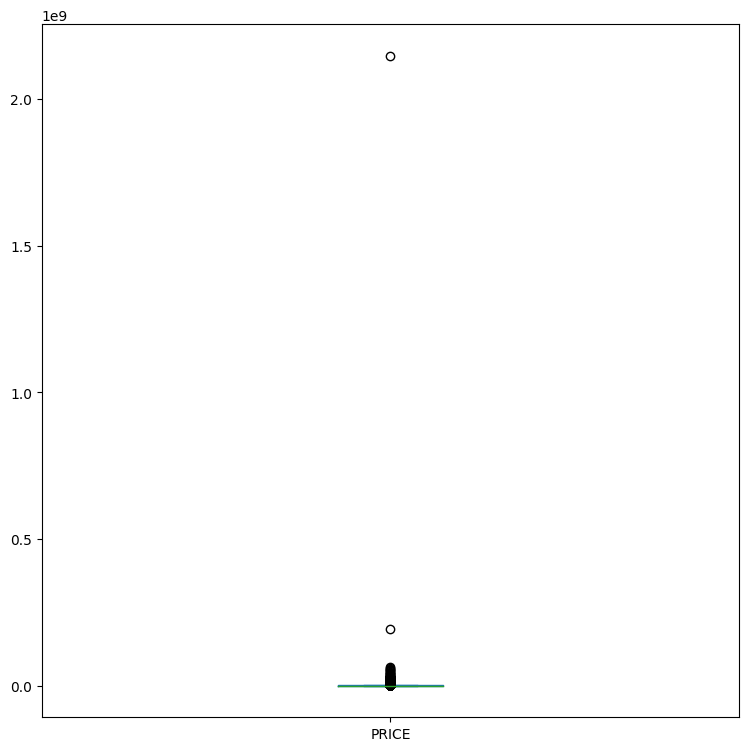

In [22]:
data['PRICE'].plot(kind="box", figsize=(9,9))

In [23]:
# Calculate the skewness of the data
skewness = data['PRICE'].skew()

# Print the skewness value
print("Skewness of the dataset:", skewness)

# If skewness is positive, apply log transformation to make the data more symmetric
if skewness > 0:
    transformed_data = np.log1p(data['PRICE'])  # Log transformation
    # Replace the skewed column with the transformed data
    data['PRICE'] = transformed_data

# Print the updated skewness after transformation
print("Skewness after transformation:", data['PRICE'].skew())

Skewness of the dataset: 66.80000463489985
Skewness after transformation: 0.8226331868556626


<Axes: >

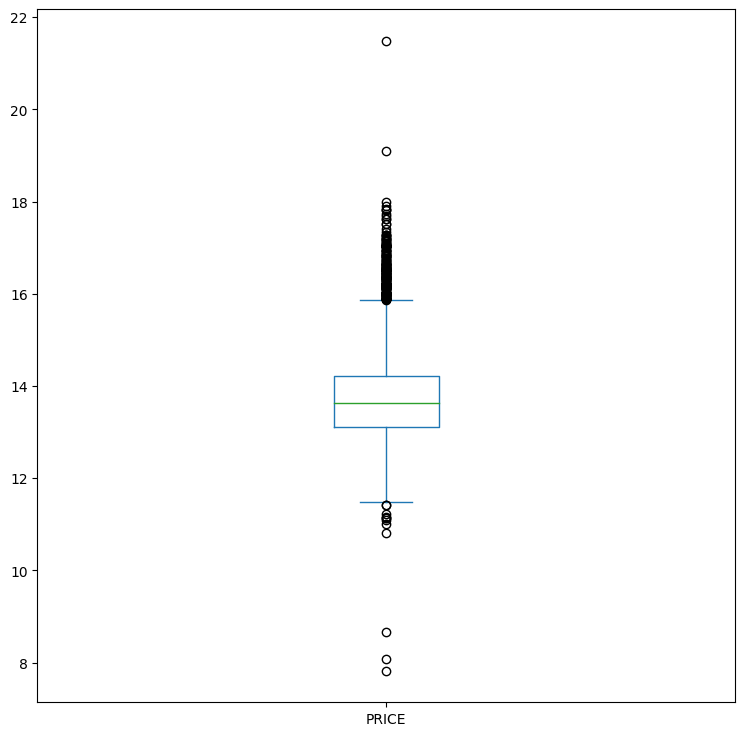

In [24]:
data['PRICE'].plot(kind="box", figsize=(9,9))

In [62]:
from scipy.stats import boxcox

# Assuming your dataset is stored in a pandas DataFrame called 'df'
# Replace 'your_column_name' with the name of the column you want to transform

# Shift the data to ensure positivity
min_value = data['PRICE'].min()
if min_value <= 0:
    shift_amount = abs(min_value) + 1  # Add 1 to ensure positivity after shifting
    data['PRICE'] += shift_amount
else:
    shift_amount = 0  # No need to shift if min_value is already positive

# Apply the Box-Cox transformation to make the data symmetric within the range (-0.5, 0.5)
transformed_data, lambda_ = boxcox(data['PRICE'])

# Print the lambda value used in the transformation
print("Lambda value:", lambda_)

# If lambda is close to zero, the transformation approximates a logarithmic transformation

# Unshift the transformed data
transformed_data -= shift_amount

# Update the DataFrame with the transformed data
data['PRICE'] = transformed_data


Lambda value: 1.000034132882029


for beds

In [26]:
data['BEDS']

0       2
1       7
2       4
3       3
4       7
       ..
4796    1
4797    1
4798    1
4799    2
4800    1
Name: BEDS, Length: 4801, dtype: int64

In [27]:
print(round(statistics.mean(data['BEDS']),2))

3.36


In [28]:
print(statistics.median(data['BEDS']))

3


In [29]:
print(statistics.stdev(data['BEDS']))

2.602314693140107


In [30]:
print(statistics.variance(data['BEDS']))

6.772041762132889


In [31]:
q1=np.percentile(data['BEDS'],25)
print(q1)
q3=np.percentile(data['BEDS'],75)
print(q3)

2.0
4.0


In [32]:
from scipy.stats import skew
print(skew(data['BEDS']))

5.447439265773591


<Axes: >

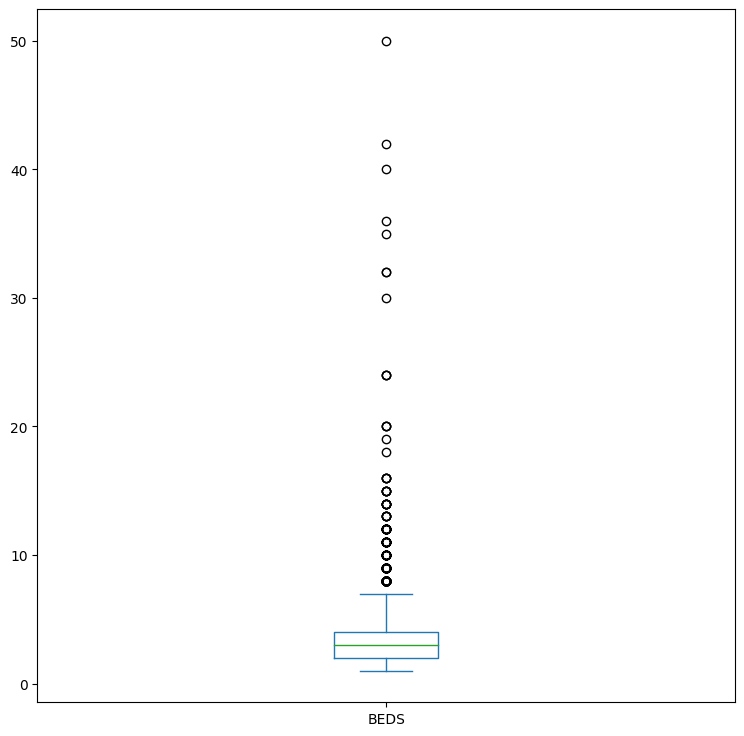

In [33]:
data['BEDS'].plot(kind="box", figsize=(9,9))

In [66]:
# Calculate the skewness of the beds
skewness = data['BEDS'].skew()

# Print the skewness value
print("Skewness of the dataset:", skewness)

# If skewness is positive, apply log transformation to make the data more symmetric
if skewness > 0:
    transformed_data = np.log1p(data['BEDS'])  # Log transformation
    # Replace the skewed column with the transformed data
    data['BEDS'] = transformed_data

# Print the updated skewness after transformation
print("Skewness after transformation:", data['BEDS'].skew())

Skewness of the dataset: -0.08499366311010038
Skewness after transformation: -0.08499366311010038


<Axes: >

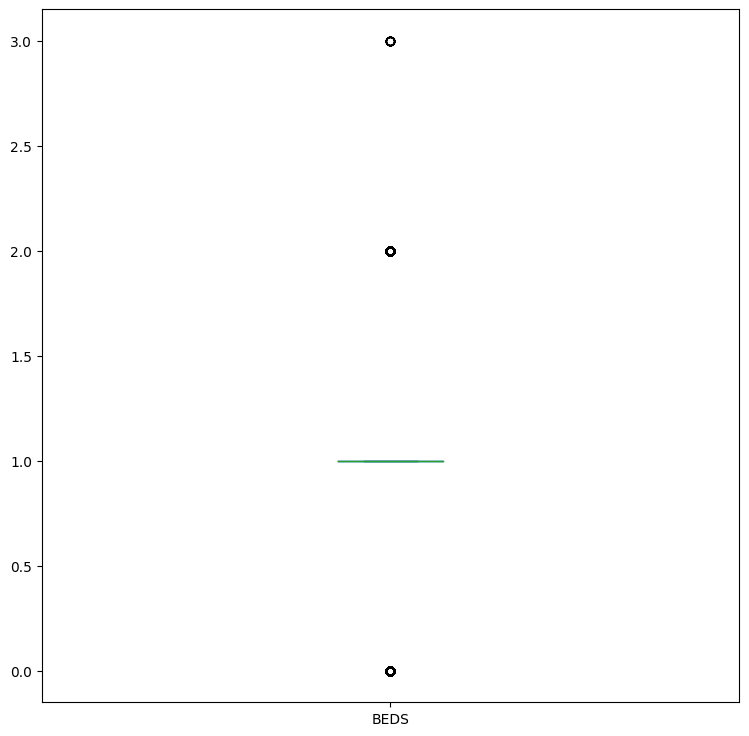

In [65]:
data['BEDS'].plot(kind="box", figsize=(9,9))

<Axes: ylabel='Frequency'>

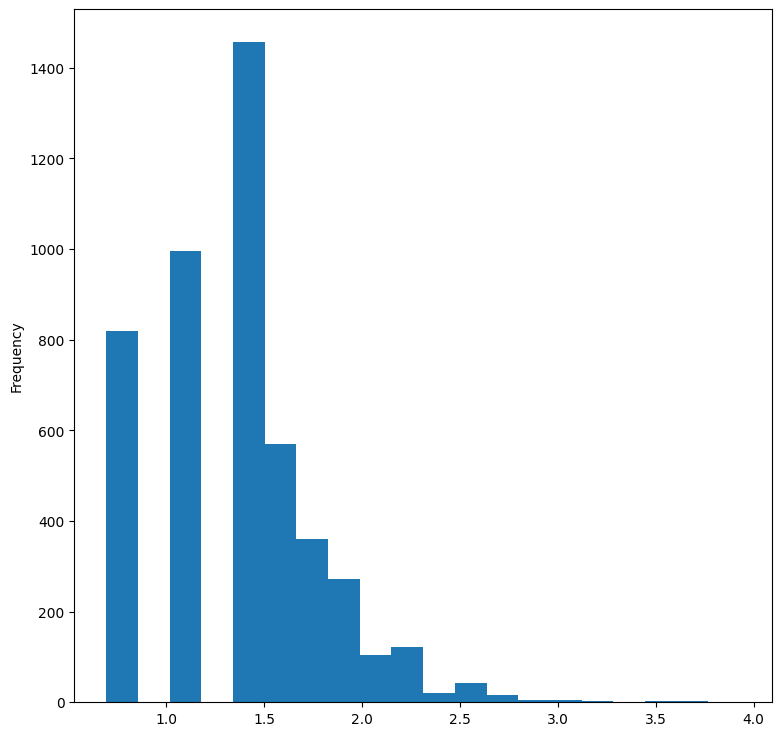

In [36]:
data['BEDS'].plot(kind = "hist", figsize=(9,9),bins=20)

In [37]:
from scipy.stats import skew
print(skew(data['BEDS']))

0.5419813855647306


For bath

In [38]:
#convert data type float in to int

In [39]:
data['BATH']=data['BATH'].astype(int)
data['BEDS']=data['BEDS'].astype(int)

In [40]:
data.dtypes

BROKERTITLE                     object
TYPE                            object
PRICE                          float64
BEDS                             int64
BATH                             int64
PROPERTYSQFT                   float64
ADDRESS                         object
STATE                           object
MAIN_ADDRESS                    object
ADMINISTRATIVE_AREA_LEVEL_2     object
LOCALITY                        object
SUBLOCALITY                     object
STREET_NAME                     object
LONG_NAME                       object
FORMATTED_ADDRESS               object
LATITUDE                       float64
LONGITUDE                      float64
dtype: object

In [41]:
data['BATH']

0        2
1       10
2        2
3        1
4        2
        ..
4796     1
4797     1
4798     1
4799     1
4800     1
Name: BATH, Length: 4801, dtype: int64

Binary classification

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [43]:
print(data.describe())



             PRICE         BEDS         BATH  PROPERTYSQFT     LATITUDE  \
count  4801.000000  4801.000000  4801.000000   4801.000000  4801.000000   
mean      1.033614     0.900646     2.350344   2184.207862    40.714227   
std       0.007538     0.488110     1.949077   2377.140894     0.087676   
min       0.959263     0.000000     0.000000    230.000000    40.499546   
25%       1.029251     1.000000     1.000000   1200.000000    40.639375   
50%       1.033218     1.000000     2.000000   2184.207862    40.726749   
75%       1.037570     1.000000     3.000000   2184.207862    40.771923   
max       1.072284     3.000000    50.000000  65535.000000    40.912729   

         LONGITUDE  
count  4801.000000  
mean    -73.941601  
std       0.101082  
min     -74.253033  
25%     -73.987143  
50%     -73.949189  
75%     -73.870638  
max     -73.702450  


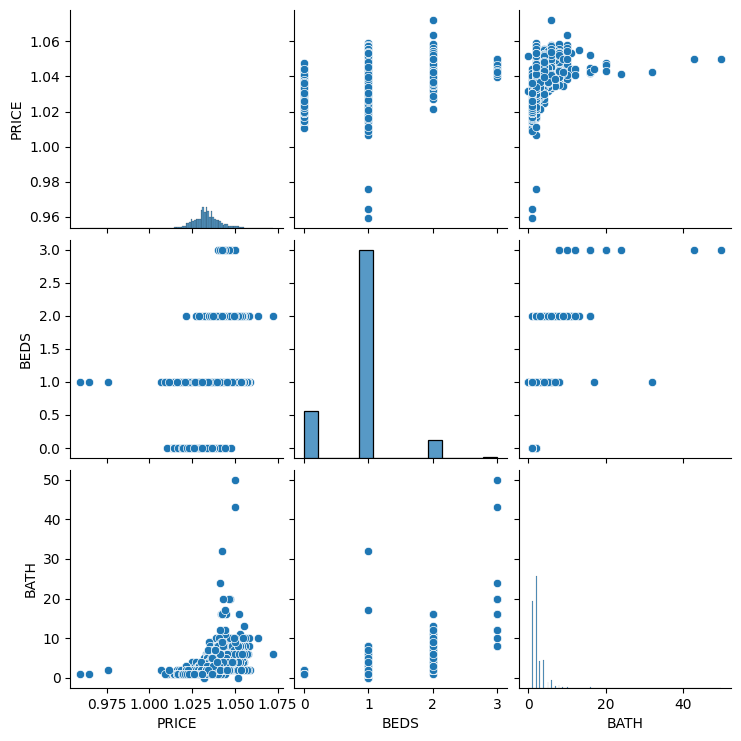

In [44]:
# Data Exploration
sns.pairplot(data[['PRICE', 'BEDS', 'BATH']])
plt.show()

================================================================================

In [45]:
np.random.seed(0)
num_samples = len(data)
print(data['PRICE'].min())

0.9592633459443087


In [46]:
house_prices = np.random.randint(min(data['PRICE']), max(data['PRICE']), num_samples)
num_bedrooms = np.random.randint(min(data['BEDS']), max(data['BEDS']), num_samples)
num_bathrooms = np.random.randint(min(data['BATH']), max(data['BATH']), num_samples)


labels = np.random.randint(0, 2, num_samples)  # Binary labels: 0 or 1

In [47]:
# Creating feature matrix
X = np.column_stack((data['PRICE'], data['BEDS'], data['BATH']))

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [48]:
# Training a logistic regression model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

LogisticRegression()

In [49]:
y_pred = model.predict(X_test_scaled)

# Calculating accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.4724245577523413


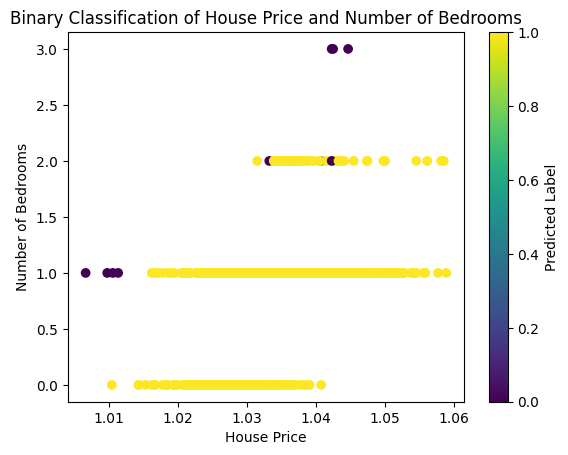

In [50]:
# Visualizing the data
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, cmap='viridis')
plt.xlabel('House Price')
plt.ylabel('Number of Bedrooms')
plt.title('Binary Classification of House Price and Number of Bedrooms')
plt.colorbar(label='Predicted Label')
plt.show()

In [55]:
# Predicting whether the next house price is in the acceptable price range or not
new_house_price = 300000
new_num_bedrooms = 1
new_num_bathrooms = 2

new_data = scaler.transform([[new_house_price, new_num_bedrooms, new_num_bathrooms]])
prediction = model.predict(new_data)
if prediction[0] == 1:
    print("The next house price is in the acceptable price range.")
else:
    print("The next house price is not in the acceptable price range.")

The next house price is in the acceptable price range.
